## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [186]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [187]:
df = pd.read_csv('ab_data.csv')

In [188]:
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [189]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


b. Use the cell below to find the number of rows in the dataset.

In [190]:
df.count()

user_id         294478
timestamp       294478
group           294478
landing_page    294478
converted       294478
dtype: int64

c. The number of unique users in the dataset.

In [191]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [192]:
df[df['converted'] == 1].user_id.count()/ df.user_id.count()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [193]:
len(df[((df['group'] == 'treatment') & (df['landing_page'] != 'new_page'))|((df['group'] != 'treatment') & (df['landing_page'] == 'new_page'))])


3893

f. Do any of the rows have missing values?

In [194]:
# through this code, we can make sure we have full values in every row 
sum(df.isnull().sum(axis=1))

0

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [195]:
df2 =df.drop(df[((df['group'] == 'treatment') & (df['landing_page'] != 'new_page'))|((df['group'] != 'treatment') & (df['landing_page'] == 'new_page'))|((df['group'] != 'control') & (df['landing_page'] == 'old_page'))|((df['group'] != 'control') & (df['landing_page'] == 'old_page'))].index )

In [196]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [197]:
df2.user_id.nunique()

290584

In [198]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


b. There is one **user_id** repeated in **df2**.  What is it?
**The following rows are the ones that are duplicates of each other**

In [199]:
duplicated_row1 =df2[ df2.duplicated(['user_id'], keep = 'last') == True]
duplicated_row1

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [200]:
duplicated_row2 =df2[ df2.duplicated(['user_id'], keep = 'first') == True]
duplicated_row2

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [201]:
# the difference between the two previous rows is the time, the rest of the information is the same
duplicated_row1, duplicated_row2

(      user_id                   timestamp      group landing_page  converted
 1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0,
       user_id                   timestamp      group landing_page  converted
 2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0)

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.
Just to make sure, I measured how many rows I have

In [202]:
df2 = df2.drop_duplicates(['user_id'])
# just to make sure we removed the duplicates
df2.user_id.count()== df2.count()

user_id         True
timestamp       True
group           True
landing_page    True
converted       True
dtype: bool

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [203]:
len(df2.query('converted == 1'))/len(df2)

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [204]:
control_grp = df2.query('group == "control"')

len(control_grp[control_grp['converted'] == 1])/len(control_grp)

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [205]:
treatment_grp = df2.query('group == "treatment"')

len(treatment_grp[treatment_grp['converted'] == 1])/len(treatment_grp)

0.11880806551510564

d. What is the probability that an individual received the new page?

In [206]:
new_page_grp = df2.query('landing_page == "new_page"')

len(new_page_grp)/len(df2)

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**From the previous calculations, the probability of those who converted from the treatment group is quite similar to the probability of those who converted from the control group. In addition, all the previously mentioned probabilities are close to the probabilities of those who converted overall; thus, this helps me discern that having a new page is not likely linked to having more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here. For now, I will assume the 
null hypothesis to be:  **$p_{new}$** - **$p_{old}$** **<= 0  
and the alternative hypothesis to be : **$p_{new}$** - **$p_{old}$** > 0 ****

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>


**As previously mentioned, the converted "success rate" was previously mentioned. What we know now is that we are going to assume that these two, $p_{new}$ and $p_{old}$ are all going to be equal**

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [207]:
p_new = df2.converted.mean()

p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [208]:
# since they equal each other...
p_old = df2.converted.mean()

p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [209]:
n_new = df2.query('group == "treatment"').user_id.count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [210]:
n_old =df2.query('group == "control"').user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.
In the following is an example of bootstrapping. In each of the new_page_converted and the old_page_converted, we will generate more of the 0 converted and 1 converted but it is based on the probability produced previously. and since we assumed that the new_page and the old_page will be the same, the only difference will be based on the size.

In [211]:
# since we are going to have n_new transactions , then it will be the size
#also, it will be either 1 or zero while each having its probability
new_page_converted = np.random.choice([0, 1], size = n_new, p = [p_new, 1 - p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [212]:
# since we are going to have n_old transactions , then it will be the size
#also, it will be either 1 or zero while each having its probability
old_page_converted = np.random.choice([0, 1], size = n_old, p = [p_old, 1 - p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

**After simulating the values, we will find the difference.**

In [213]:
diff = new_page_converted.mean() - old_page_converted.mean()
diff

0.0011858923143461819

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [214]:
#here, we will implement the same as what we previously did 
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size = n_new, p = [p_new, 1 - p_new])
    old_page_converted = np.random.choice([0, 1], size = n_old, p = [p_old, 1 - p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected? Use the matching problem in the classroom to assure you fully understand what was computed here.
**It does look as expected, it is in normal distribution**

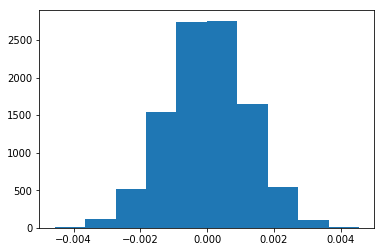

In [215]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [216]:
# first, we must change it to an array type
p_diffs = np.array(p_diffs)

# next, we will provide the difference from the dataset's mean 
actual_diffs = df2[(df2['group'] == 'treatment')].converted.mean() - df2[(df2['group'] == 'control')].converted.mean() 

# so we can compare 
actual_diffs

-0.0015782389853555567

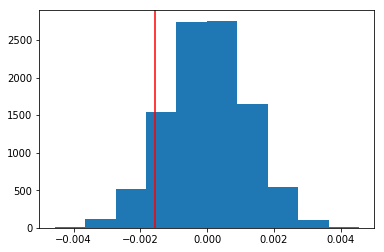

In [217]:
plt.hist(p_diffs);
plt.axvline(x=actual_diffs,c='red');

In [218]:
# then, we can see the difference between the two through the following

(p_diffs> actual_diffs).mean()

0.90490000000000004

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The last value computed is called the p-value. In the previous example, we have seen that the values' difference is very minor and is almost zero. In addition, we can see from the p-value that there is certainly no difference between the old and the new pages or maybe the old page is better; thus, the null is most possibly true in this case.**

l. We could also use a built-in to achieve similar results. Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [219]:
import statsmodels.api as sm

# these values 
convert_old = df2.query('landing_page == "old_page"').converted.sum()
convert_new = df2.query('landing_page == "new_page"').converted.sum()
n_old = df2.query('landing_page == "old_page"').user_id.count()
n_new = df2.query('landing_page == "new_page"').user_id.count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [220]:
#since I have two samples, I will put them in an array for both the count and the nobs
#in addition, I will have equal proportions 
# we will choose the 'alternative to be smaller' based on our hypothesis 
zstat,p_value = sm.stats.proportions_ztest( [convert_old,convert_new],[n_old,n_new] , alternative='smaller')

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [221]:
from scipy.stats import norm
# this will help men understand how significant the zstat is 
norm.cdf(zstat)

0.90505831275902449

In [222]:
#the following is the critical value of 95% confidence interval 
norm.ppf(1-(0.05)) 

1.6448536269514722

**As previouly shown, we can see that the value of zstat is less than the critical value; thus, we fail to reject the null hypothesis. Also, it is clear that our findings surely match the computations in J.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**The most appropriate kind of regression is Logistic regression, for we only have two classes.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [223]:
# create the intercept first 
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


In [224]:
# since the group is categorical, we will use dummies to deal with them
df2[['ab_page0' ,'ab_page']] = pd.get_dummies(df2['group'])

df2.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page0,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1


In [225]:
# we will drop the ab_page0 because we don't need it 
df2 = df2.drop(['ab_page0'], axis = 1)
df2.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [226]:
# I tried using .summary() but it didn't work. So I tried to use summary2()
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [227]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-06-25 12:13 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value of ab_page is 0.1899, and it is less than that of the one in the second part which is 0.905. We also previously said that the null hypothesis is that the old page is either greater than or equal to the new page, but here the null hypothesis is whether the two are equal to each other.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**In real world situations, we can see that there are a lot of factors that can lead to the results we see, but on the other hand, some of these factors may have no significance or relation to what we aim to inspect.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [228]:

countries_df = pd.read_csv('./countries.csv')

# joining new dataset with the old one
merged_df = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

merged_df.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [229]:
# the following are the three unique countries 
merged_df['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [230]:
#As mentioned, we only needed 2 columns
#I used US as the 00 value 
merged_df[['CA', 'UK']] = pd.get_dummies(merged_df['country'])[['CA', 'UK']]
merged_df.head(20)

merged_df.query('country == "US"').head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK
user_id,,,,,,,,,
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,1,0,0
938122,US,2017-01-10 09:32:08.222716,treatment,new_page,1,1,1,0,0
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0,1,1,0,0
820683,US,2017-01-14 11:52:06.521342,treatment,new_page,0,1,1,0,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [231]:
log_mod1 = sm.Logit(merged_df['converted'], merged_df[['intercept', 'ab_page','CA', 'UK']])
results1 = log_mod1.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [232]:
# the previous kind, .summary() didn't work. 
results1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-06-25 12:13 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

**Conclusion:

   **In conclusion, we aught to say that all the p-values suggest that we hav no clear evidence to reject the null hypothesis. In other words, they are alll not significant. **

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [233]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0